<a href="https://colab.research.google.com/github/lucas-pinto/NUIN443/blob/main/problemSets/NUIN443_ps10_neural_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib widget
%matplotlib widget

## Problem Set 10: Applying Concepts from Dynamical Systems Theory to Neurodynamic Models

This problem set is targeted at the material that was presented on May 8th on dynamical system methods and their application to neurodynamica modeling problems. The lecture notes cover all the material that is required for answering the questions below and also provide various code examples that will be helpful.


### Problem 1: The dynamics of the QIF neuron

<br/>

In class, the quadratic integrate-and-fire neuron was introduced as a one-dimensional neuron model governed by the differential equation

$$\dot v = v^2 + I(t),$$

where $v$ represents the membrane potential of the neuron and $I(t)$ is the time-dependent input to the neuron.
Furthermore, the QIF neuron requires a reset rule to allow for the model to generate spikes:

$$ v > v_{\text{cutoff}}: v \leftarrow v_{\text{reset}},$$

i.e. when the membrane potential reaches the cutoff value $v_{\text{cutoff}}$, the QIF neuron is said to generate a spike and the membrane potential is reset to $v_{\text{reset}}$.
Here, you will explore the dynamics of the QIF neuron in a bit more detail.

<br/>

**Your task:**

For this problem, you will use the Euler method for solving differential equations to generate time series of the QIF neuron.
As part of the class, it was shown that the QIF neuron has two equilibrium points if $I < 0$ and no equilibrium points if $I > 0$.
To visualize the dynamics of the neuron in these different dynamical regimes, perform simulations for the following scenarios:

1. The QIF neuron is in a resting state and receives a subthreshold input $I(t)$ that excites the neuron but fails to generate a spike
2. The QIF neuron is in a resting state and receives a superthreshold input $I(t)$ that leads to the generation of a single spike
3. The QIF neuron is in a regular spiking state and receives an input that temporarily silences the neuron (i.e. spike generation stops for a while and then comes back on)

For each of these regimes, you are asked to do the following:

- define an extrinsinc input for each of the simulation steps. Choose a tonic input level, and a time window in which the input takes on a different value than the tonic input.
- perform a simulation of the QIF neuron dynamics when driven by the input you defined (i.e. solve the initial value problem numerically)
- generate a plot that depicts the QIF neuron dynamics as well as the input over time
- visualize the phase portrait of the QIF neuron for the tonic and phasic input regimes
- plot the QIF neuron dynamics for the tonic and phasic input regimes as a trajectory on top of the phase portrait


In [55]:
150e-3

0.15

In [56]:
inp

array([-30., -30., -30., ..., -30., -30., -30.])

In [103]:
inp.shape

(100000,)

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 519097.03it/s]


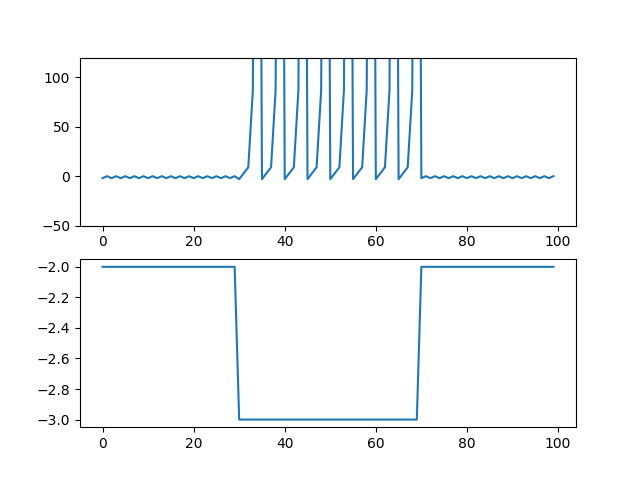

In [129]:
# Scenario I
############

def qif(v, I):
    return v**2 + I


# simulation parameters
T = 100.0
t = 100
dt = 1

# define input
inp = np.ones(int(t))
inp = inp*-2
inp[30:70] = -3
v_store = []

v0=0
v=v0

v_cutoff = 1000

# perform simulation
for timestep in tqdm(np.arange(0, int(t), dt)):
    dv = qif(v, inp[timestep])
    v = v+dv
    if v>v_cutoff:
        v_store.append(v_cutoff)
        v=v0
    else:
        v_store.append(v)

# generate plots
fig, ax = plt.subplots(nrows=2)
ax[0].set_ylim(-50,120)
ax[0].plot(v_store[:100])
ax[1].plot(inp[:100])



In [31]:
np.arange(0,100,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
inp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Scenario II
#############

In [ ]:
# Scenario III
##############

### Problem 2: A biophysical neuron model

A more biophysical version of the QIF neuron has been developed by Eugene Izhikevich (Izhikevich 2007). The membrane potential dynamics of this neuron model follows the evolution equation

$$ \dot v = \frac{1}{C}(k(v - v_r)(v - v_t) + I(t)),$$

where $k$, $C$, $v_r$, and $v_t$ are biophysical constants of the neuron model and $I(t)$ is an input, again.
The neuron model also has a reset rule that is identical to the reset rule of the QIF neuron

$$ v > v_{\text{cutoff}}: v \leftarrow v_{\text{reset}}.$$


For this neuron model, answer the following questions:
1. how many equilibrium points does the neuron model have?
2. where are the equilibrium points located and what is their stability?
3. do any bifurcation points exist in the neuron model? If yes, where are they?
4. What is the meaning of the equilibrium points and potential bifurcation points for the neuronal dynamics (i.e. can you provide a biophysical interpretation)?
5. How do $C$ and $k$ affect the dynamics of the neuron model?

To support your answers to these questions, plot the vector field of the neuron model against the membrane potential for different chocies of $C$ and $k$. You may also choose to perform simulations of the neuron dynamics in response to a transient input $I(t)$ and plot the resulting time series in support of your answers.